# Machine Learning 

In [128]:
import os

os.chdir('drive/MyDrive/2024-cnu-lecture')

## K-Nearest Neighbor (KNN)

- KNN은 지도학습의 한 종류로 거리 기반의 분류모델임
- 비지도학습의 클러스터링과 유사하나 Y값 (class, 반응값)이 있다는 점에서 클러스터링과 차이
- 설명변수 X 값들을 이용해 반응변수 Y (분류)값을 설명하는 모형으로
- 새로운 데이터가 주어질 경우 K개의 인접한 데이터를 찾아서 이에 속한 클래스로 분류 수행 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import seaborn as sns

- https://github.com/HongleiXie/MLFromScratch
- 각종 ML 모형 (python, tensorflow 프레임워크)

In [6]:
breast_cancer = load_breast_cancer()

In [ ]:
dir(breast_cancer)
print(breast_cancer.DESCR)

In [8]:
print(breast_cancer.data.shape)
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- dummy y 변수 생성

In [9]:
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)
y

,benign
0,False
1,False
2,False
3,False
4,False
...,...
564,False
565,False
566,False
567,False


- 데이터셋 준비 (훈련/테스트셋)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

- 모형 훈련 및 그래프

/home/haseong/anaconda3/envs/biopy/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<Axes: xlabel='mean area', ylabel='mean compactness'>

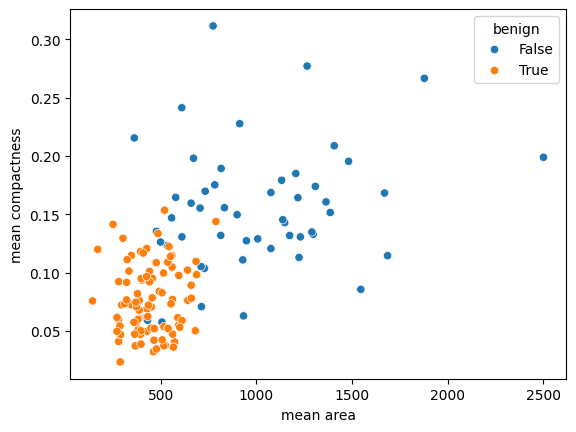

In [11]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)

- 예측 성능

In [ ]:
results = pd.DataFrame([y_test["benign"].values, y_pred], index=("test", "predict")).T
print(results)

In [13]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9370629370629371


- 변수 중요도 탐색

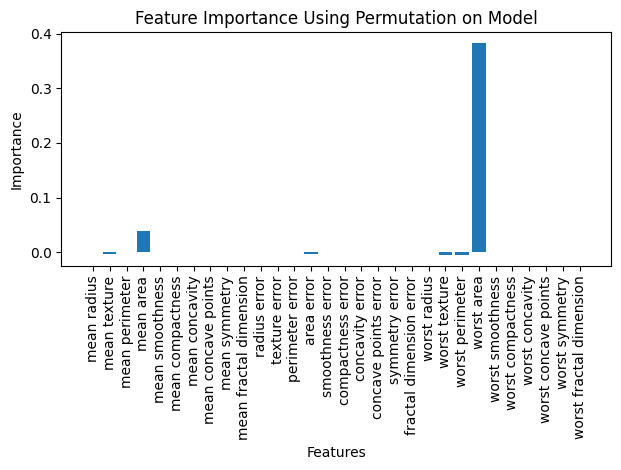

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation feature importance
results = permutation_importance(knn, X_test, y_test, n_repeats=5, random_state=40)

# Get importance scores
feature_importance = results.importances_mean

# Plot feature importance
plt.bar(range(X.shape[1]), feature_importance, tick_label=breast_cancer.feature_names)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Using Permutation on Model')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()